```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Wealth Distribution Dynamics

```{admonition} GPU in use
:class: warning

This lecture is accelerated via [hardware](status:machine-details) that has access to a GPU and JAX for GPU programming.

Free GPUs are available on Google Colab. To use this option, please click on the play icon top right, select Colab, and set the runtime environment to include a GPU.

Alternatively, if you have your own GPU, you can follow the [instructions](https://github.com/google/jax#pip-installation-gpu-cuda) for installing JAX with GPU support.
```

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install quantecon
# If your machine has CUDA support, please follow the guide in GPU Warning.
# Otherwise, run the line below:
!pip install --upgrade "jax[CPU]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.2 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.0 MB/s eta 0:00:00


  Preparing metadata (setup.py) ... -

 done


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/72.6 MB ? eta -:--:--

     ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/72.6 MB 127.5 MB/s eta 0:00:01

     ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/72.6 MB 123.1 MB/s eta 0:00:01

     ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/72.6 MB 123.5 MB/s eta 0:00:01

     ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.6/72.6 MB 123.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 30.4/72.6 MB 123.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 34.7/72.6 MB 123.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 43.5/72.6 MB 125.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 48.0/72.6 MB 125.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━ 56.8/72.6 MB 125.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━ 61.3/72.6 MB 125.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━ 65.7/72.6 MB 125.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 70.2/72.6 MB 126.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 72.6/72.6 MB 127.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 72.6/72.6 MB 127.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 72.6/72.6 MB 127.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 72.6/72.6 MB 127.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 72.6/72.6 MB 127.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 72.6/72.6 MB 127.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.6/72.6 MB 24.3 MB/s eta 0:00:00


 \

 |

 /

 -

 \

 done
  Created wheel for jax: filename=jax-0.4.4-py3-none-any.whl size=1403831 sha256=c0e124f6ebd6ff0b140b788a02e746d9b17fd706faf95f5e54b176f2f95470b0
  Stored in directory: /github/home/.cache/pip/wheels/12/85/72/8b6d48cd0df9ee52f902943e465c81a315a2584314459f6d1d


Successfully built jax


  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.2+cuda11.cudnn86
    Uninstalling jaxlib-0.4.2+cuda11.cudnn86:
      Successfully uninstalled jaxlib-0.4.2+cuda11.cudnn86


  Attempting uninstall: jax
    Found existing installation: jax 0.4.2


    Uninstalling jax-0.4.2:
      Successfully uninstalled jax-0.4.2


## Overview

This notebook gives an introduction to wealth distribution dynamics, with a
focus on

* modeling and computing the wealth distribution via simulation,
* measures of inequality such as the Lorenz curve and Gini coefficient, and
* how inequality is affected by the properties of wage income and returns on assets.

One interesting property of the wealth distribution we discuss is Pareto
tails.

The wealth distribution in many countries exhibits a Pareto tail

* See {doc}`this lecture <heavy_tails>` for a definition.
* For a review of the empirical evidence, see, for example, {cite}`benhabib2018skewed`.

This is consistent with high concentration of wealth amongst the richest households.

It also gives us a way to quantify such concentration, in terms of the tail index.

One question of interest is whether or not we can replicate Pareto tails from a relatively simple model.

### A Note on Assumptions

The evolution of wealth for any given household depends on their
savings behavior.

Modeling such behavior will form an important part of this lecture series.

However, in this particular lecture, we will be content with rather ad hoc (but plausible) savings rules.

We do this to more easily explore the implications of different specifications of income dynamics and investment returns.

At the same time, all of the techniques discussed here can be plugged into models that use optimization to obtain savings rules.

We will use the following imports.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import quantecon as qe
from numba import njit, float64, prange
from numba.experimental import jitclass
import jax
import jax.numpy as jnp
from collections import namedtuple
from myst_nb import glue

Let's check the backend used by JAX and the devices available

In [3]:
# Check if JAX is using GPU
print(f"JAX backend: {jax.devices()[0].platform}")
# Check the devices available for JAX
print(jax.devices())

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


JAX backend: cpu
[CpuDevice(id=0)]


## Lorenz Curves and the Gini Coefficient

Before we investigate wealth dynamics, we briefly review some measures of
inequality.

### Lorenz Curves

One popular graphical measure of inequality is the [Lorenz curve](https://en.wikipedia.org/wiki/Lorenz_curve).

The package [QuantEcon.py](https://github.com/QuantEcon/QuantEcon.py), already imported above, contains a function to compute Lorenz curves.

To illustrate, suppose that

In [4]:
n = 10_000                      # size of sample
w = np.exp(np.random.randn(n))  # lognormal draws

is data representing the wealth of 10,000 households.

We can compute and plot the Lorenz curve as follows:

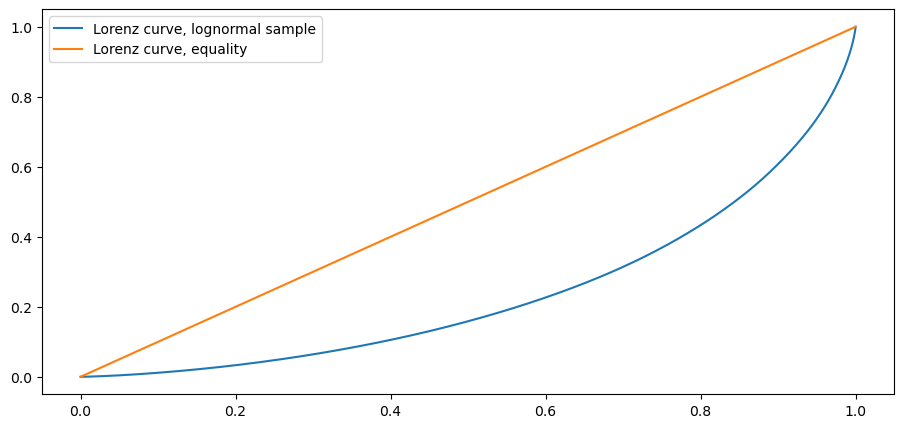

In [5]:
f_vals, l_vals = qe.lorenz_curve(w)

fig, ax = plt.subplots()
ax.plot(f_vals, l_vals, label='Lorenz curve, lognormal sample')
ax.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax.legend()
plt.show()

This curve can be understood as follows: if point $(x,y)$ lies on the curve, it means that, collectively, the bottom $(100x)\%$ of the population holds $(100y)\%$ of the wealth.

The "equality" line is the 45 degree line (which might not be exactly 45
degrees in the figure, depending on the aspect ratio).

A sample that produces this line exhibits perfect equality.

The other line in the figure is the Lorenz curve for the lognormal sample, which deviates significantly from perfect equality.

For example, the bottom 80% of the population holds around 40% of total wealth.

Here is another example, which shows how the Lorenz curve shifts as the
underlying distribution changes.

We generate 10,000 observations using the Pareto distribution with a range of
parameters, and then compute the Lorenz curve corresponding to each set of
observations.

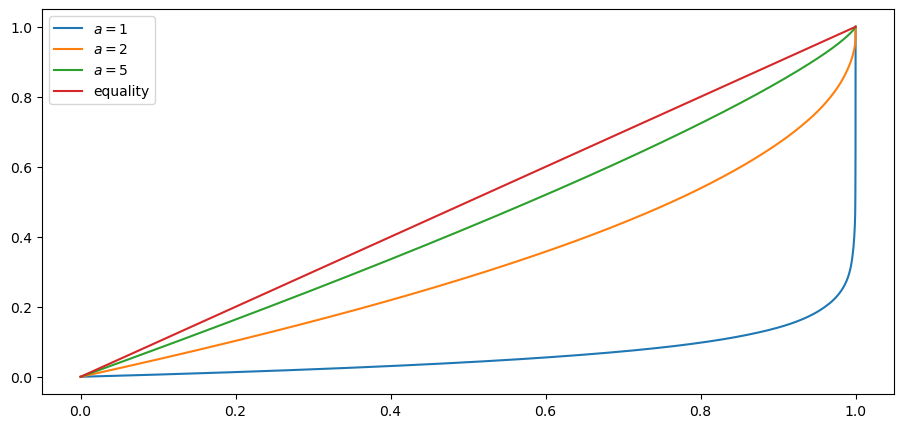

In [6]:
a_vals = (1, 2, 5)              # Pareto tail index
n = 10_000                      # size of each sample
fig, ax = plt.subplots()
for a in a_vals:
    u = np.random.uniform(size=n)
    y = u**(-1/a)               # distributed as Pareto with tail index a
    f_vals, l_vals = qe.lorenz_curve(y)
    ax.plot(f_vals, l_vals, label=f'$a = {a}$')
ax.plot(f_vals, f_vals, label='equality')
ax.legend()
plt.show()

You can see that, as the tail parameter of the Pareto distribution increases, inequality decreases.

This is to be expected, because a higher tail index implies less weight in the tail of the Pareto distribution.

### The Gini Coefficient

The definition and interpretation of the Gini coefficient can be found on the corresponding [Wikipedia page](https://en.wikipedia.org/wiki/Gini_coefficient).

A value of 0 indicates perfect equality (corresponding the case where the
Lorenz curve matches the 45 degree line) and a value of 1 indicates complete
inequality (all wealth held by the richest household).

The [QuantEcon.py](https://github.com/QuantEcon/QuantEcon.py) library contains a function to calculate the Gini coefficient.

We can test it on the Weibull distribution with parameter $a$, where the Gini coefficient is known to be

$$
G = 1 - 2^{-1/a}
$$

Let's see if the Gini coefficient computed from a simulated sample matches
this at each fixed value of $a$.

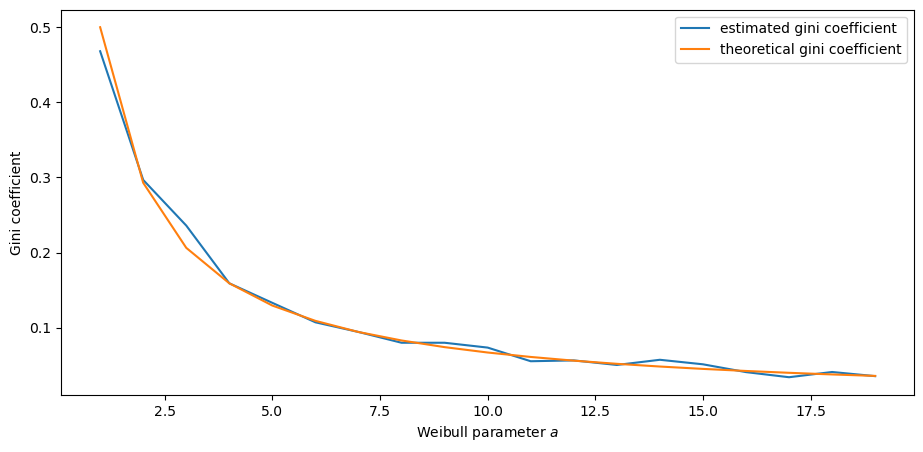

In [7]:
a_vals = range(1, 20)
ginis = []
ginis_theoretical = []
n = 100

fig, ax = plt.subplots()
for a in a_vals:
    y = np.random.weibull(a, size=n)
    ginis.append(qe.gini_coefficient(y))
    ginis_theoretical.append(1 - 2**(-1/a))
ax.plot(a_vals, ginis, label='estimated gini coefficient')
ax.plot(a_vals, ginis_theoretical, label='theoretical gini coefficient')
ax.legend()
ax.set_xlabel("Weibull parameter $a$")
ax.set_ylabel("Gini coefficient")
plt.show()

The simulation shows that the fit is good.

## A Model of Wealth Dynamics

Having discussed inequality measures, let us now turn to wealth dynamics.

The model we will study is

```{math}
:label: wealth_dynam_ah

w_{t+1} = (1 + r_{t+1}) s(w_t) + y_{t+1}
```

where

- $w_t$ is wealth at time $t$ for a given household,
- $r_t$ is the rate of return of financial assets,
- $y_t$ is current non-financial (e.g., labor) income and
- $s(w_t)$ is current wealth net of consumption

Letting $\{z_t\}$ be a correlated state process of the form

$$
z_{t+1} = a z_t + b + \sigma_z \epsilon_{t+1}
$$

we’ll assume that

$$
R_t := 1 + r_t = c_r \exp(z_t) + \exp(\mu_r + \sigma_r \xi_t)
$$

and

$$
y_t = c_y \exp(z_t) + \exp(\mu_y + \sigma_y \zeta_t)
$$

Here $\{ (\epsilon_t, \xi_t, \zeta_t) \}$ is IID and standard
normal in $\mathbb R^3$.

The value of $c_r$ should be close to zero, since rates of return
on assets do not exhibit large trends.

When we simulate a population of households, we will assume all shocks are idiosyncratic (i.e.,  specific to individual households and independent across them).

Regarding the savings function $s$, our default model will be

```{math}
:label: sav_ah

s(w) = s_0 w \cdot \mathbb 1\{w \geq \hat w\}
```

where $s_0$ is a positive constant.

Thus, for $w < \hat w$, the household saves nothing. For
$w \geq \bar w$, the household saves a fraction $s_0$ of
their wealth.

We are using something akin to a fixed savings rate model, while
acknowledging that low wealth households tend to save very little.

## Implementation using JAX

Let's define a model to represent the wealth dynamics.

In [8]:
# NamedTuple Model
Model = namedtuple("Model", ("w_hat", "s_0", "c_y", "μ_y",
                             "σ_y", "c_r", "μ_r", "σ_r", "a",
                             "b", "σ_z", "z_mean", "z_var", "y_mean"))

Here's a function to create the Model with the given parameters

In [9]:
def create_wealth_model(w_hat=1.0,
                        s_0=0.75,
                        c_y=1.0,
                        μ_y=1.0,
                        σ_y=0.2,
                        c_r=0.05,
                        μ_r=0.1,
                        σ_r=0.5,
                        a=0.5,
                        b=0.0,
                        σ_z=0.1):
    """
    Create a wealth model with given parameters and return
    and instance of NamedTuple Model.
    """
    z_mean = b / (1 - a)
    z_var = σ_z**2 / (1 - a**2)
    exp_z_mean = np.exp(z_mean + z_var / 2)
    R_mean = c_r * exp_z_mean + np.exp(μ_r + σ_r**2 / 2)
    y_mean = c_y * exp_z_mean + np.exp(μ_y + σ_y**2 / 2)
    # Test a stability condition that ensures wealth does not diverge
    # to infinity.
    α = R_mean * s_0
    if α >= 1:
        raise ValueError("Stability condition failed.")
    return Model(w_hat=w_hat, s_0=s_0, c_y=c_y, μ_y=μ_y,
                 σ_y=σ_y, c_r=c_r, μ_r=μ_r, σ_r=σ_r, a=a,
                 b=b, σ_z=σ_z, z_mean=z_mean, z_var=z_var, y_mean=y_mean)

The following function updates one period with the given current wealth and persistent state.

In [10]:
def update_states_jax(arrays, wdy, size, rand_key):
    """
    Update one period, given current wealth w and persistent
    state z. They are stored in the form of tuples under the arrays argument
    """
    # Unpack w and z
    w, z = arrays

    rand_key, *subkey = jax.random.split(rand_key, 3)
    zp = wdy.a * z + wdy.b + wdy.σ_z * jax.random.normal(rand_key, shape=size)

    # Update wealth
    y = wdy.c_y * jnp.exp(zp) + jnp.exp(wdy.μ_y + wdy.σ_y * jax.random.normal(subkey[0], shape=size))
    wp = y

    R = wdy.c_r * jnp.exp(zp) + jnp.exp(wdy.μ_r + wdy.σ_r * jax.random.normal(subkey[1], shape=size))
    wp += (w >= wdy.w_hat) * R * wdy.s_0 * w
    return wp, zp

# Create the jit function
update_states_jax = jax.jit(update_states_jax, static_argnums=(2,))

Here’s function to simulate the time series of wealth for individual households using a `for` loop and JAX.

In [11]:
# Using JAX and for loop
def wealth_time_series_for_loop_jax(w_0, n, wdy, size, rand_seed=1):
    """
    Generate a single time series of length n for wealth given
    initial value w_0.

    * This implementation uses a for loop.

    The initial persistent state z_0 for each household is drawn from
    the stationary distribution of the AR(1) process.

        * wdy: NamedTuple Model
        * w_0: scalar/vector
        * n: int
        * size: size/shape of the w_0
        * rand_seed: int (Used to generate PRNG key)
    """
    rand_key = jax.random.PRNGKey(rand_seed)
    rand_key, *subkey = jax.random.split(rand_key, n)

    w_0 = jax.device_put(w_0).reshape(size)

    z = wdy.z_mean + jnp.sqrt(wdy.z_var) * jax.random.normal(rand_key, shape=size)
    w = [w_0]
    for t in range(n-1):
        w_, z = update_states_jax((w[t], z), wdy, size, subkey[t])
        w.append(w_)
    return jnp.array(w)

# Create the jit function
wealth_time_series_for_loop_jax = jax.jit(wealth_time_series_for_loop_jax, static_argnums=(1,3,))

Let's try simulating the model at different parameter values and investigate the implications for the wealth distribution using the above function.

In [12]:
wdy = create_wealth_model() # default model
ts_length = 200
size = (1,)

In [13]:
qe.tic()
w_jax_result = wealth_time_series_for_loop_jax(wdy.y_mean, ts_length, wdy, size).block_until_ready()
qe.toc()

2023-02-22 03:36:21.137289: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module jit_wealth_time_series_for_loop_jax] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


TOC: Elapsed: 0:25:46.79


2023-02-22 03:55:04.177102: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 20m43.03993043s

********************************
[Compiling module jit_wealth_time_series_for_loop_jax] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


1546.7909824848175

Running the above function again will be even faster because of JAX's JIT.

In [14]:
qe.tic()
# 2nd time is expected to be very fast because of JIT
w_jax_result = wealth_time_series_for_loop_jax(wdy.y_mean, ts_length, wdy, size).block_until_ready()
qe.toc()

TOC: Elapsed: 0:00:0.00


0.0032625198364257812

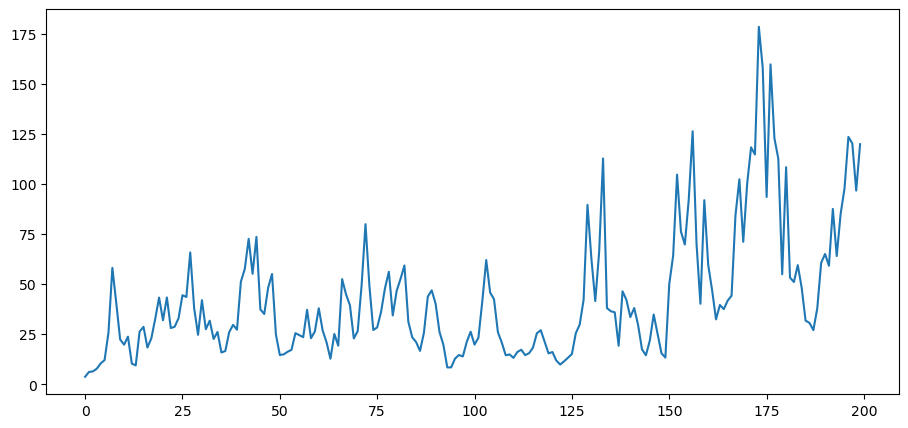

In [15]:
fig, ax = plt.subplots()
ax.plot(w_jax_result)
plt.show()

We can further try to optimize and speed up the compile time of the above function by replacing `for` loop with [`jax.lax.scan`](https://jax.readthedocs.io/en/latest/_autosummary/jax.lax.scan.html).

In [16]:
def wealth_time_series_jax(w_0, n, wdy, size, rand_seed=1):
    """
    Generate a single time series of length n for wealth given
    initial value w_0.

    * This implementation uses for jax.lax.scan

    The initial persistent state z_0 for each household is drawn from
    the stationary distribution of the AR(1) process.

        * wdy: NamedTuple Model
        * w_0: scalar/vector
        * n: int
        * size: size/shape of the w_0
        * rand_seed: int (Used to generate PRNG key)
    """
    rand_key = jax.random.PRNGKey(rand_seed)
    rand_key, *subkey = jax.random.split(rand_key, n)

    w_0 = jax.device_put(w_0).reshape(size)
    z_init = wdy.z_mean + jnp.sqrt(wdy.z_var) * jax.random.normal(rand_key, shape=size)
    arrays = w_0, z_init
    rand_sub_keys = jnp.array(subkey)

    w_final = jnp.array([w_0])

    # Define the function for each update
    def update_w_z(arrays, rand_sub_key):
        wp, zp = update_states_jax(arrays, wdy, size, rand_sub_key)
        return (wp, zp), wp

    arrays_last, w_values = jax.lax.scan(update_w_z, arrays, rand_sub_keys)
    return jnp.concatenate((w_final, w_values))

# Create the jit function
wealth_time_series_jax = jax.jit(wealth_time_series_jax, static_argnums=(1,3,))

Let's try simulating the model at different parameter values and investigate the implications for the wealth distribution and also observe the difference in time between `wealth_time_series_jax` and `wealth_time_series_for_loop_jax`.

In [17]:
wdy = create_wealth_model() # default model
ts_length = 200
size = (1,)

In [18]:
qe.tic()
w_jax_result = wealth_time_series_jax(wdy.y_mean, ts_length, wdy, size).block_until_ready()
glue("wealth_time_series_jax_time_1", qe.toc())

TOC: Elapsed: 0:00:0.90


0.9044885635375977

Running the above function again will be even faster because of JAX's JIT.

In [19]:
qe.tic()
# 2nd time is expected to be very fast because of JIT
w_jax_result = wealth_time_series_jax(wdy.y_mean, ts_length, wdy, size).block_until_ready()
glue("wealth_time_series_jax_time_2", qe.toc())

TOC: Elapsed: 0:00:0.00


0.0005314350128173828

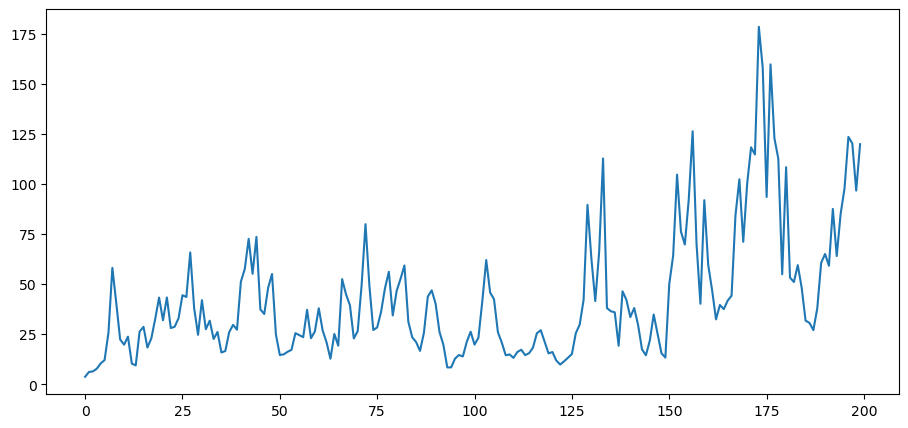

In [20]:
fig, ax = plt.subplots()
ax.plot(w_jax_result)
plt.show()

Now here’s function to simulate a cross section of households forward in time.

In [21]:
def update_cross_section_jax(w_distribution, shift_length, wdy, size, rand_seed=2):
    """
    Shifts a cross-section of household forward in time

    * wdy: NamedTuple Model
    * w_distribution: array_like, represents current cross-section

    Takes a current distribution of wealth values as w_distribution
    and updates each w_t in w_distribution to w_{t+j}, where
    j = shift_length.

    Returns the new distribution.
    """
    new_dist = wealth_time_series_jax(w_distribution, shift_length, wdy, size, rand_seed)
    new_distribution = new_dist[-1, :]
    return new_distribution

# Create the jit function
update_cross_section_jax = jax.jit(update_cross_section_jax, static_argnums=(1,3,))

## Implementation using Numba

Here's some type information to help Numba.

In [22]:
wealth_dynamics_data = [
    ('w_hat',  float64),    # savings parameter
    ('s_0',    float64),    # savings parameter
    ('c_y',    float64),    # labor income parameter
    ('μ_y',    float64),    # labor income paraemter
    ('σ_y',    float64),    # labor income parameter
    ('c_r',    float64),    # rate of return parameter
    ('μ_r',    float64),    # rate of return parameter
    ('σ_r',    float64),    # rate of return parameter
    ('a',      float64),    # aggregate shock parameter
    ('b',      float64),    # aggregate shock parameter
    ('σ_z',    float64),    # aggregate shock parameter
    ('z_mean', float64),    # mean of z process
    ('z_var', float64),     # variance of z process
    ('y_mean', float64),    # mean of y process
    ('R_mean', float64)     # mean of R process
]

Here's a class that stores instance data and implements methods that update
the aggregate state and household wealth.

In [23]:
@jitclass(wealth_dynamics_data)
class WealthDynamics:

    def __init__(self,
                 w_hat=1.0,
                 s_0=0.75,
                 c_y=1.0,
                 μ_y=1.0,
                 σ_y=0.2,
                 c_r=0.05,
                 μ_r=0.1,
                 σ_r=0.5,
                 a=0.5,
                 b=0.0,
                 σ_z=0.1):

        self.w_hat, self.s_0 = w_hat, s_0
        self.c_y, self.μ_y, self.σ_y = c_y, μ_y, σ_y
        self.c_r, self.μ_r, self.σ_r = c_r, μ_r, σ_r
        self.a, self.b, self.σ_z = a, b, σ_z

        # Record stationary moments
        self.z_mean = b / (1 - a)
        self.z_var = σ_z**2 / (1 - a**2)
        exp_z_mean = np.exp(self.z_mean + self.z_var / 2)
        self.R_mean = c_r * exp_z_mean + np.exp(μ_r + σ_r**2 / 2)
        self.y_mean = c_y * exp_z_mean + np.exp(μ_y + σ_y**2 / 2)

        # Test a stability condition that ensures wealth does not diverge
        # to infinity.
        α = self.R_mean * self.s_0
        if α >= 1:
            raise ValueError("Stability condition failed.")

    def parameters(self):
        """
        Collect and return parameters.
        """
        parameters = (self.w_hat, self.s_0,
                      self.c_y, self.μ_y, self.σ_y,
                      self.c_r, self.μ_r, self.σ_r,
                      self.a, self.b, self.σ_z)
        return parameters

    def update_states(self, w, z):
        """
        Update one period, given current wealth w and persistent
        state z.
        """

        # Simplify names
        params = self.parameters()
        w_hat, s_0, c_y, μ_y, σ_y, c_r, μ_r, σ_r, a, b, σ_z = params
        zp = a * z + b + σ_z * np.random.randn()

        # Update wealth
        y = c_y * np.exp(zp) + np.exp(μ_y + σ_y * np.random.randn())
        wp = y
        if w >= w_hat:
            R = c_r * np.exp(zp) + np.exp(μ_r + σ_r * np.random.randn())
            wp += R * s_0 * w
        return wp, zp

Here's function to simulate the time series of wealth for in individual households.

In [24]:
@njit
def wealth_time_series(wdy, w_0, n):
    """
    Generate a single time series of length n for wealth given
    initial value w_0.

    The initial persistent state z_0 for each household is drawn from
    the stationary distribution of the AR(1) process.

        * wdy: an instance of WealthDynamics
        * w_0: scalar
        * n: int


    """
    z = wdy.z_mean + np.sqrt(wdy.z_var) * np.random.randn()
    w = np.empty(n)
    w[0] = w_0
    for t in range(n-1):
        w[t+1], z = wdy.update_states(w[t], z)
    return w

Now here's function to simulate a cross section of households forward in time.

Note the use of parallelization to speed up computation.

In [25]:
@njit(parallel=True)
def update_cross_section(wdy, w_distribution, shift_length=500):
    """
    Shifts a cross-section of household forward in time

    * wdy: an instance of WealthDynamics
    * w_distribution: array_like, represents current cross-section

    Takes a current distribution of wealth values as w_distribution
    and updates each w_t in w_distribution to w_{t+j}, where
    j = shift_length.

    Returns the new distribution.

    """
    new_distribution = np.empty_like(w_distribution)

    # Update each household
    for i in prange(len(new_distribution)):
        z = wdy.z_mean + np.sqrt(wdy.z_var) * np.random.randn()
        w = w_distribution[i]
        for t in range(shift_length-1):
            w, z = wdy.update_states(w, z)
        new_distribution[i] = w
    return new_distribution

Parallelization is very effective in the function above because the time path
of each household can be calculated independently once the path for the
aggregate state is known.

## Applications

Let's try simulating the model at different parameter values and investigate
the implications for the wealth distribution.

### Time Series

Let's look at the wealth dynamics of an individual household using numba.

In [26]:
wdy = WealthDynamics()

ts_length = 200

In [27]:
qe.tic()
w = wealth_time_series(wdy, wdy.y_mean, ts_length)
glue("wealth_time_series_time_1", qe.toc())

TOC: Elapsed: 0:00:0.72


0.726926326751709

In [28]:
qe.tic()
# Check the time for 2nd execution
w = wealth_time_series(wdy, wdy.y_mean, ts_length)
glue("wealth_time_series_time_2", qe.toc())

TOC: Elapsed: 0:00:0.00


0.0001506805419921875

Notice the time difference between the `wealth_time_series`: {glue:}`wealth_time_series_time_1` and `wealth_time_series_jax`: {glue:}`wealth_time_series_jax_time_1`

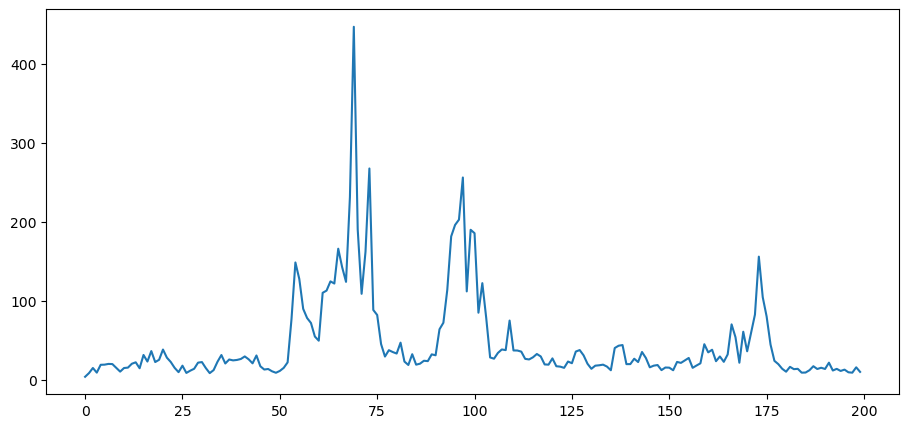

In [29]:
fig, ax = plt.subplots()
ax.plot(w)
plt.show()

Notice the large spikes in wealth over time.

Such spikes are similar to what we observed in time series when {doc}`we studied Kesten processes <kesten_processes>`.

### Inequality Measures

Let's look at how inequality varies with returns on financial assets.

The next function generates a cross section and then computes the Lorenz
curve and Gini coefficient.

Let's first write the function that uses the JAX implementation and then for the numba.

In [30]:
# Uses JAX
def generate_lorenz_and_gini_jax(wdy, num_households=100_000, T=500):
    """
    Generate the Lorenz curve data and gini coefficient corresponding to a
    WealthDynamics mode by simulating num_households forward to time T.
    """
    size = (num_households, )
    ψ_0 = jnp.full(size, wdy.y_mean)
    ψ_star = update_cross_section_jax(ψ_0, T, wdy, size)
    ψ_star = jax.device_get(ψ_star)  # get back to numpy form
    return qe.gini_coefficient(ψ_star), qe.lorenz_curve(ψ_star)

The following function uses the numba implementation

In [31]:
# Uses numba
def generate_lorenz_and_gini(wdy, num_households=100_000, T=500):
    """
    Generate the Lorenz curve data and gini coefficient corresponding to a
    WealthDynamics mode by simulating num_households forward to time T.
    """
    ψ_0 = np.full(num_households, wdy.y_mean)
    z_0 = wdy.z_mean

    ψ_star = update_cross_section(wdy, ψ_0, shift_length=T)
    return qe.gini_coefficient(ψ_star), qe.lorenz_curve(ψ_star)

Now we investigate how the Lorenz curves associated with the wealth distribution change as return to savings varies.

The code below plots Lorenz curves for three different values of $\mu_r$.

If you are running this yourself, note that it will take one or two minutes to execute.

This is unavoidable because we are executing a CPU intensive task.

In fact the code, which is JIT compiled and parallelized, runs extremely fast relative to the number of computations.

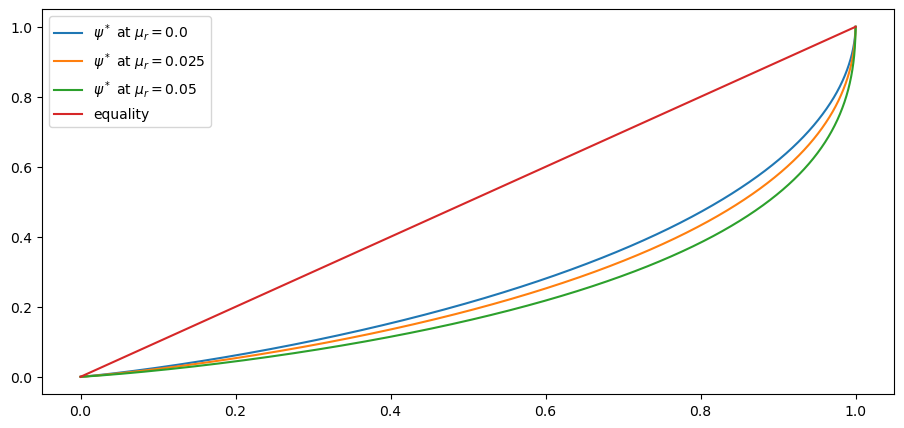

CPU times: user 1min 22s, sys: 2.78 s, total: 1min 25s
Wall time: 17.7 s


In [32]:
%%time

fig, ax = plt.subplots()
μ_r_vals = (0.0, 0.025, 0.05)
gini_vals = []

for μ_r in μ_r_vals:
    wdy = create_wealth_model(μ_r=μ_r)
    gv, (f_vals, l_vals) = generate_lorenz_and_gini_jax(wdy)
    ax.plot(f_vals, l_vals, label=f'$\psi^*$ at $\mu_r = {μ_r:0.2}$')
    gini_vals.append(gv)

ax.plot(f_vals, f_vals, label='equality')
ax.legend(loc="upper left")
plt.show()

Now let's try to run the same code snippet but using the numba version.

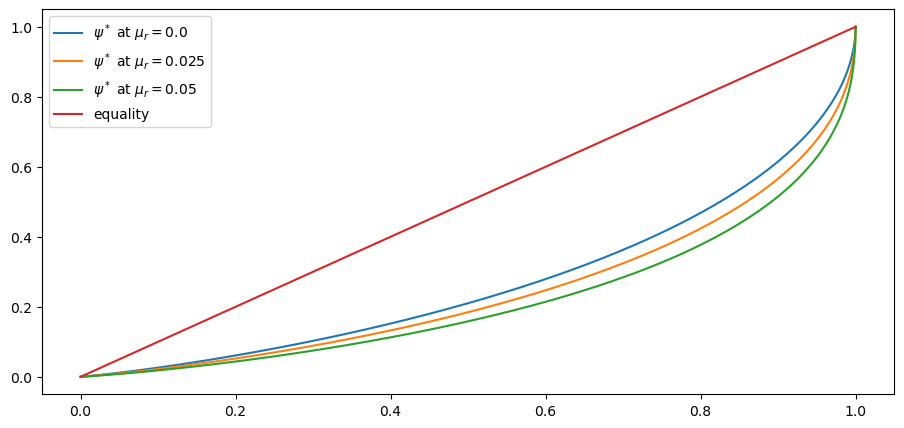

CPU times: user 1min 32s, sys: 133 ms, total: 1min 33s
Wall time: 12.8 s


In [33]:
%%time

fig, ax = plt.subplots()
μ_r_vals = (0.0, 0.025, 0.05)
gini_vals = []

for μ_r in μ_r_vals:
    wdy = WealthDynamics(μ_r=μ_r)
    gv, (f_vals, l_vals) = generate_lorenz_and_gini(wdy)
    ax.plot(f_vals, l_vals, label=f'$\psi^*$ at $\mu_r = {μ_r:0.2}$')
    gini_vals.append(gv)

ax.plot(f_vals, f_vals, label='equality')
ax.legend(loc="upper left")
plt.show()

The Lorenz curve shifts downwards as returns on financial income rise, indicating a rise in inequality.

We will look at this again via the Gini coefficient immediately below, but
first consider the following image of our system resources when the code above
is executing:

Since the code is both efficiently JIT compiled and fully parallelized, it's
close to impossible to make this sequence of tasks run faster without changing
hardware.

Now let's check the Gini coefficient.

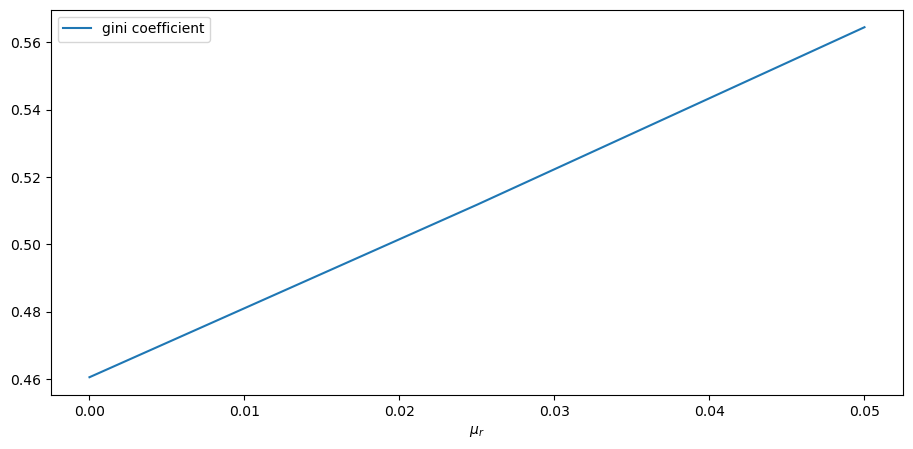

In [34]:
fig, ax = plt.subplots()
ax.plot(μ_r_vals, gini_vals, label='gini coefficient')
ax.set_xlabel("$\mu_r$")
ax.legend()
plt.show()

Once again, we see that inequality increases as returns on financial income
rise.

Let's finish this section by investigating what happens when we change the
volatility term $\sigma_r$ in financial returns.

Firstly, using JAX, we have

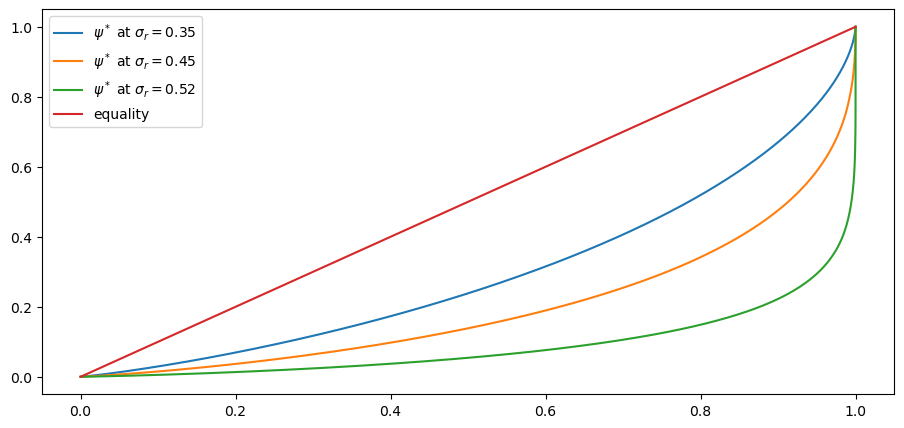

CPU times: user 1min 17s, sys: 2.87 s, total: 1min 20s
Wall time: 13 s


In [35]:
%%time

fig, ax = plt.subplots()
σ_r_vals = (0.35, 0.45, 0.52)
gini_vals = []

for σ_r in σ_r_vals:
    wdy = create_wealth_model(σ_r=σ_r)
    gv, (f_vals, l_vals) = generate_lorenz_and_gini_jax(wdy)
    ax.plot(f_vals, l_vals, label=f'$\psi^*$ at $\sigma_r = {σ_r:0.2}$')
    gini_vals.append(gv)

ax.plot(f_vals, f_vals, label='equality')
ax.legend(loc="upper left")
plt.show()

Using numba, we get,

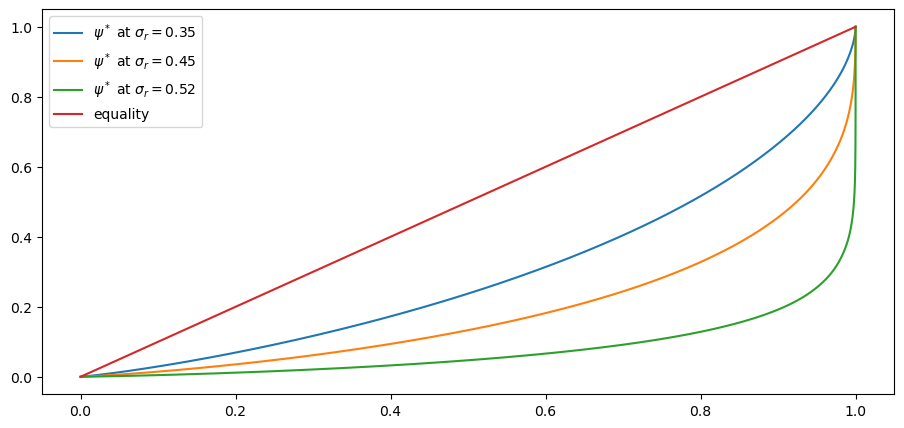

CPU times: user 1min 31s, sys: 149 ms, total: 1min 32s
Wall time: 11.8 s


In [36]:
%%time

fig, ax = plt.subplots()
σ_r_vals = (0.35, 0.45, 0.52)
gini_vals = []

for σ_r in σ_r_vals:
    wdy = WealthDynamics(σ_r=σ_r)
    gv, (f_vals, l_vals) = generate_lorenz_and_gini(wdy)
    ax.plot(f_vals, l_vals, label=f'$\psi^*$ at $\sigma_r = {σ_r:0.2}$')
    gini_vals.append(gv)

ax.plot(f_vals, f_vals, label='equality')
ax.legend(loc="upper left")
plt.show()

We see that greater volatility has the effect of increasing inequality in this model.

## Exercises

```{exercise}
:label: wd_ex1

For a wealth or income distribution with Pareto tail, a higher tail index suggests lower inequality.

Indeed, it is possible to prove that the Gini coefficient of the Pareto
distribution with tail index $a$ is $1/(2a - 1)$.

To the extent that you can, confirm this by simulation.

In particular, generate a plot of the Gini coefficient against the tail index
using both the theoretical value just given and the value computed from a sample via `qe.gini_coefficient`.

For the values of the tail index, use `a_vals = np.linspace(1, 10, 25)`.

Use sample of size 1,000 for each $a$ and the sampling method for generating Pareto draws employed in the discussion of Lorenz curves for the Pareto distribution.

To the extent that you can, interpret the monotone relationship between the
Gini index and $a$.
```

```{solution-start} wd_ex1
:class: dropdown
```

Here is one solution, which produces a good match between theory and
simulation.

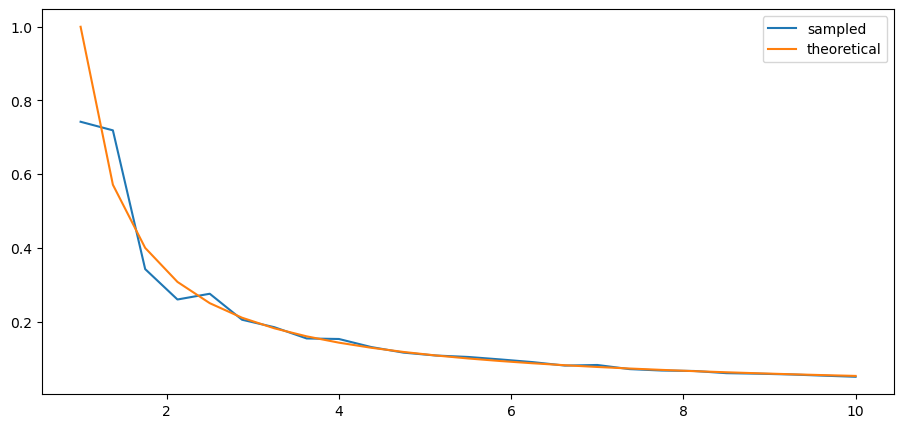

In [37]:
a_vals = np.linspace(1, 10, 25)  # Pareto tail index
ginis = np.empty_like(a_vals)

n = 1000                         # size of each sample
fig, ax = plt.subplots()
for i, a in enumerate(a_vals):
    y = np.random.uniform(size=n)**(-1/a)
    ginis[i] = qe.gini_coefficient(y)
ax.plot(a_vals, ginis, label='sampled')
ax.plot(a_vals, 1/(2*a_vals - 1), label='theoretical')
ax.legend()
plt.show()

In general, for a Pareto distribution, a higher tail index implies less weight
in the right hand tail.

This means less extreme values for wealth and hence more equality.

More equality translates to a lower Gini index.

```{solution-end}
```

```{exercise-start}
:label: wd_ex2
```

The wealth process {eq}`wealth_dynam_ah` is similar to a {doc}`Kesten process <kesten_processes>`.

This is because, according to {eq}`sav_ah`, savings is constant for all wealth levels above $\hat w$.

When savings is constant, the wealth process has the same quasi-linear
structure as a Kesten process, with multiplicative and additive shocks.

The Kesten--Goldie theorem tells us that Kesten processes have Pareto tails under a range of parameterizations.

The theorem does not directly apply here, since savings is not always constant and since the multiplicative and additive terms in {eq}`wealth_dynam_ah` are not IID.

At the same time, given the similarities, perhaps Pareto tails will arise.

To test this, run a simulation that generates a cross-section of wealth and
generate a rank-size plot.

If you like, you can use the function `rank_size` from the `quantecon` library (documentation [here](https://quanteconpy.readthedocs.io/en/latest/tools/inequality.html#quantecon.inequality.rank_size)).

In viewing the plot, remember that Pareto tails generate a straight line.  Is
this what you see?

For sample size and initial conditions, use

In [38]:
num_households = 250_000
T = 500                                      # shift forward T periods
ψ_0 = np.full(num_households, wdy.y_mean)   # initial distribution
z_0 = wdy.z_mean

```{exercise-end}
```

```{solution-start} wd_ex2
:class: dropdown
```

First let's generate the distribution:

Using the JAX implementation

In [39]:
num_households = 250_000
T = 500  # how far to shift forward in time
size = (num_households, )

wdy = create_wealth_model()
ψ_0 = jnp.full(size, wdy.y_mean)
ψ_star = update_cross_section_jax(ψ_0, T, wdy, size)
ψ_star = jax.device_get(ψ_star) # get back numpy form

Using the numba implementation

In [40]:
num_households = 250_000
T = 500  # how far to shift forward in time
wdy = WealthDynamics()
ψ_0 = np.full(num_households, wdy.y_mean)
z_0 = wdy.z_mean

ψ_star = update_cross_section(wdy, ψ_0, shift_length=T)

Now let's see the rank-size plot:

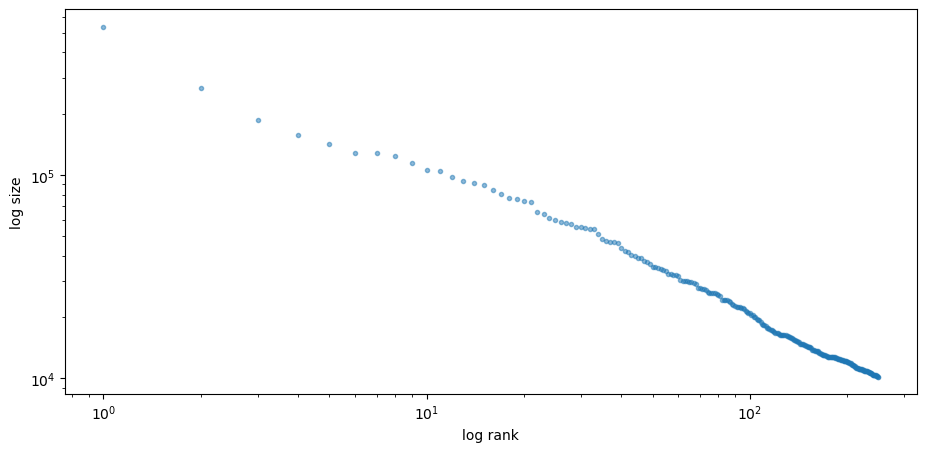

In [41]:
fig, ax = plt.subplots()

rank_data, size_data = qe.rank_size(ψ_star, c=0.001)
ax.loglog(rank_data, size_data, 'o', markersize=3.0, alpha=0.5)
ax.set_xlabel("log rank")
ax.set_ylabel("log size")

plt.show()

```{solution-end}
```